In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amssymb}')
plt.rc('font', family='serif', serif='New Century Schoolbook')
plt.rc('font', size=14)

In [10]:
def plot_circle(center, radius, fill_color=None):
    x_scan = np.linspace(-radius, radius, 101)
    plt.plot(center[0] + x_scan, center[1] + np.sqrt(radius**2 - x_scan**2), 'k')
    plt.plot(center[0] + x_scan, center[1] - np.sqrt(radius**2 - x_scan**2), 'k')
    if fill_color is not None:
        plt.fill_between(center[0] + x_scan, center[1] - np.sqrt(radius**2 - x_scan**2), 
                         center[1] + np.sqrt(radius**2 - x_scan**2), color=fill_color, alpha=0.1)
def plot_arrow_head(base, tip, fill_color=None, fill_alpha=0.1):
    size = abs(base[0]-tip[0])
    plt.plot([base[0], base[0], tip[0]], [base[1], base[1]-size/2., tip[1]], 'k', lw=0.75)
    plt.plot([base[0], base[0], tip[0]], [base[1], base[1]+size/2., tip[1]], 'k', lw=0.75)
    if fill_color is not None:
        plt.fill_between([base[0], tip[0]], [base[1]-size/2., tip[1]], [base[1]+size/2., tip[1]], 
                         color=fill_color, alpha=fill_alpha)
def plot_arrow_head_vert(base, tip, fill_color=None, fill_alpha=0.1):
    size = abs(base[1]-tip[1])
    plt.plot([base[0]-size/2., base[0], base[0]+size/2.], [base[1], tip[1], base[1]], 'k', lw=0.75)
    plt.plot([base[0]-size/2., base[0]+size/2.], [base[1], base[1]], 'k', lw=0.75)
    if fill_color is not None:
        plt.fill_between([base[0]-size/2., base[0], base[0]+size/2.], 
                         [base[1], base[1], base[1]], 
                         [base[1], tip[1], base[1]], 
                         color=fill_color, alpha=fill_alpha)
def arc(first, second):
    cutoff = 4.
    upper = 1./(1.+np.exp(-cutoff))
    lower = 1./(1.+np.exp(cutoff))
    x_scan = np.linspace(-cutoff, cutoff, 201)
    if first[1]>second[1]:
        x_scan *= -1
        first, second = second, first
    ret_x = (x_scan + cutoff)*(second[0]-first[0])/(2.*cutoff) + first[0]
    ret_y = ((((1. / (1.+np.exp(-x_scan))) - lower)/ (upper-lower)))*(second[1]-first[1]) + first[1]
    return ret_x, ret_y

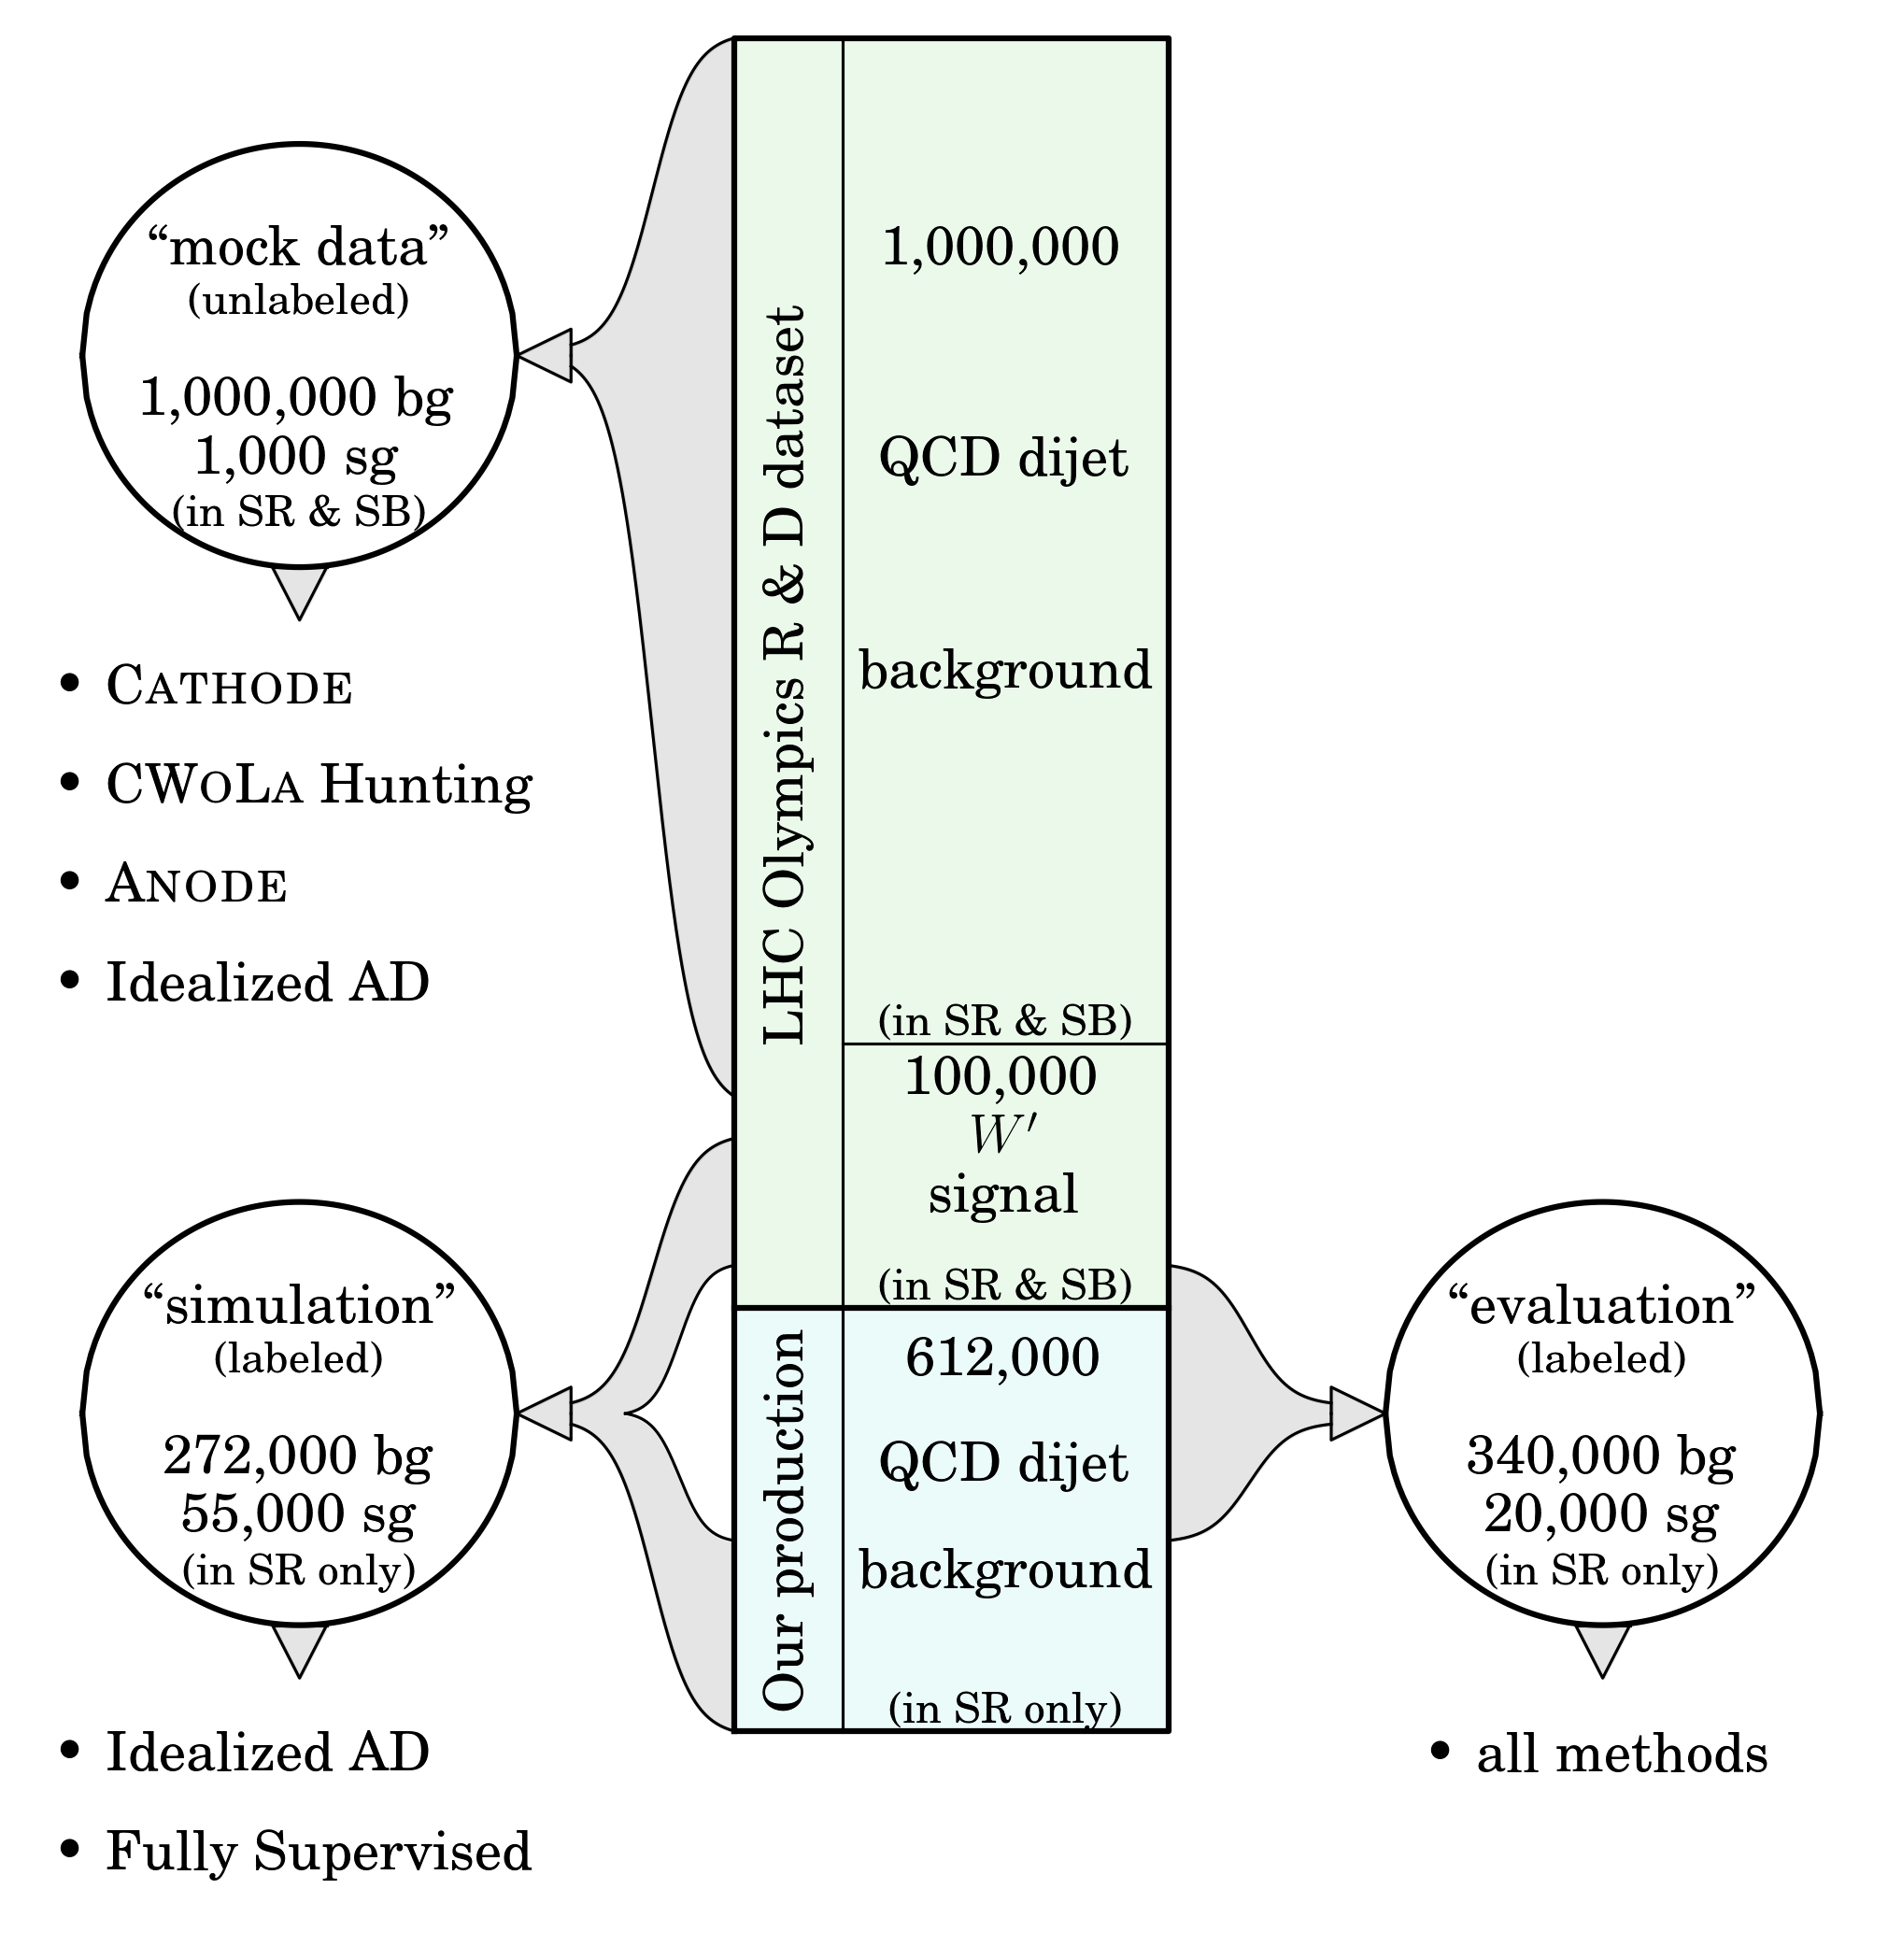

In [3]:
fig = plt.figure(dpi=300, figsize=[8.5, 9.])

small = 11

plt.plot([4., 6., 6., 4., 4.], [1., 1., 9., 9., 1.], 'k')
plt.plot([4.5, 6.], [4.25, 4.25], 'k', lw=0.75)
plt.plot([4., 6.], [3., 3.], 'k')
plt.plot([4.5, 4.5], [3., 9.], 'k', lw=0.75)
plt.plot([4.5, 4.5], [1., 3.], 'k', lw=0.75)

plt.text(4.25, 2., 'Our production', rotation=90, va='center', ha='center')
plt.text(4.25, 6., 'LHC Olympics R \& D dataset', rotation=90, va='center', ha='center')

plt.text(5.25, 8, '1,000,000', ha='center', va='center')
plt.text(5.25, 7, 'QCD dijet', ha='center', va='center')
plt.text(5.25, 6, 'background', ha='center', va='center')
plt.text(5.25, 4.25, '(in SR \& SB)', ha='center', va='bottom', fontsize=small)
plt.fill_between([4., 6.], [3., 3.], [9., 9.], color='limegreen', alpha=0.1)

#plt.text(5.25, 3.75, '100,000', ha='center', va='center')
#plt.text(5.25, 3.45, r'$W^{\prime}$', ha='center', va='center')
#plt.text(5.25, 3.15, 'signal', ha='center', va='center')
plt.text(5.25, 3.8, '100,000\n'+r'$W^{\prime}$'+'\nsignal', ha='center', va='center')
plt.text(5.25, 3., '(in SR \& SB)', ha='center', va='bottom', fontsize=small)

plt.text(5.25, 2.75, '612,000', ha='center', va='center')
plt.text(5.25, 2.25, 'QCD dijet', ha='center', va='center')
plt.text(5.25, 1.75, 'background', ha='center', va='center')
plt.text(5.25, 1, '(in SR only)', ha='center', va='bottom', fontsize=small)
plt.fill_between([4., 6.], [3., 3.], [1., 1.], color='turquoise', alpha=0.1)

plot_circle([2., 7.5], 1.)
plt.text(2., 8., '``mock data"', va='center', ha='center')
plt.text(2., 7.75, '(unlabeled)', va='center', ha='center', fontsize=small)
plt.text(2., 7.15, '1,000,000 bg\n1,000 sg', va='center', ha='center')
plt.text(2., 6.75, '(in SR \& SB)', va='center', ha='center', fontsize=small)
plot_arrow_head([3.25, 7.5], [3., 7.5], fill_color='k')
plt.plot(*arc([3.25, 7.55], [4., 9.]), 'k', lw=0.75)
plt.plot(*arc([3.25, 7.45], [4., 4.]), 'k', lw=0.75)
plt.fill_between(*arc([3.25, 7.55], [4., 9.]), arc([3.25, 7.45], [4., 4.])[1], color='k', alpha=0.1)
plot_arrow_head_vert([2., 6.5], [2., 6.25], fill_color='k')
plt.text(2., 6., 
         r'\begin{itemize}\item C\textsc{athode}\item CW\textsc{o}L\textsc{a} Hunting \item A\textsc{node}\item Idealized AD\end{itemize}',
         va='top', ha='center')


plot_circle([2., 2.5], 1.)
plt.text(2., 3., '``simulation"', va='center', ha='center')
plt.text(2., 2.75, '(labeled)', va='center', ha='center', fontsize=small)
plt.text(2., 2.15, '272,000 bg\n55,000 sg', va='center', ha='center') #was 79k
plt.text(2., 1.75, '(in SR only)', va='center', ha='center', fontsize=small)
plot_arrow_head([3.25, 2.5], [3., 2.5], fill_color='k')
plt.plot(*arc([3.25, 2.55], [4., 3.8]), 'k', lw=0.75)
plt.plot(*arc([3.25, 2.45], [4., 1.]), 'k', lw=0.75)
plt.plot(*arc([3.5, 2.5], [4., 3.2]), 'k', lw=0.75)
plt.plot(*arc([3.5, 2.5], [4., 1.9]), 'k', lw=0.75)
plt.fill_between(*arc([3.25, 2.55], [4., 3.8]), arc([3.25, 2.45], [4., 1.])[1], color='k', alpha=0.1)
plt.fill_between(*arc([3.5, 2.5], [4., 3.2]), arc([3.5, 2.5], [4., 1.9])[1], color='white')
plot_arrow_head_vert([2., 1.5], [2., 1.25], fill_color='k')
plt.text(2., 1., r'\begin{itemize}\item Idealized AD\item Fully Supervised\end{itemize}', va='top', ha='center')


plot_circle([8., 2.5], 1.)
plt.text(8., 3., '``evaluation"', va='center', ha='center')
plt.text(8., 2.75, '(labeled)', va='center', ha='center', fontsize=small)
plt.text(8., 2.15, '340,000 bg\n20,000 sg', va='center', ha='center')
plt.text(8., 1.75, '(in SR only)', va='center', ha='center', fontsize=small)
plot_arrow_head([6.75, 2.5], [7., 2.5], fill_color='k')
plt.plot(*arc([6.75, 2.55], [6., 3.2]), 'k', lw=0.75)
plt.plot(*arc([6.75, 2.45], [6., 1.9]), 'k', lw=0.75)
plt.fill_between(*arc([6.75, 2.55], [6., 3.2]), arc([7.5, 2.45], [6., 1.9])[1], color='k', alpha=0.1)
plot_arrow_head_vert([8., 1.5], [8., 1.25], fill_color='k')
plt.text(8., 1., r'\begin{itemize}\item all methods\end{itemize}', va='top', ha='center')


#plt.plot([7., 7., 9.2, 9.2, 7.], [9., 6.25, 6.25, 9., 9.], 'k')
#plt.plot([7.1, 9.1, 9.1, 7.1, 7.1], [8.25, 8.25, 8.75, 8.75, 8.25], 'k')
#plt.text(8.1, 8.5, 'available events', ha='center', va='center')
#plot_arrow_head([8.6, 7.9], [9., 7.9], fill_color='k')
#plt.plot([7.2, 8.6, 8.6, 7.2, 7.2], [7.75, 7.75, 8.05, 8.05, 7.75], 'k', lw=0.75)
#plt.fill_between([7.2, 8.6], [7.75, 7.75], [8.05, 8.05], color='k', alpha=0.1)
#plt.text(7.9, 7.9, 'used for', ha='center', va='center')
#plot_circle([8.1, 7.], 0.5)
#plt.text(8.1, 7., 'dataset', va='center', ha='center')


plt.gca().axis('off')
plt.xlim([0.75, 9.25])
plt.ylim([0.05, 9.05])

plt.savefig('data-split.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()

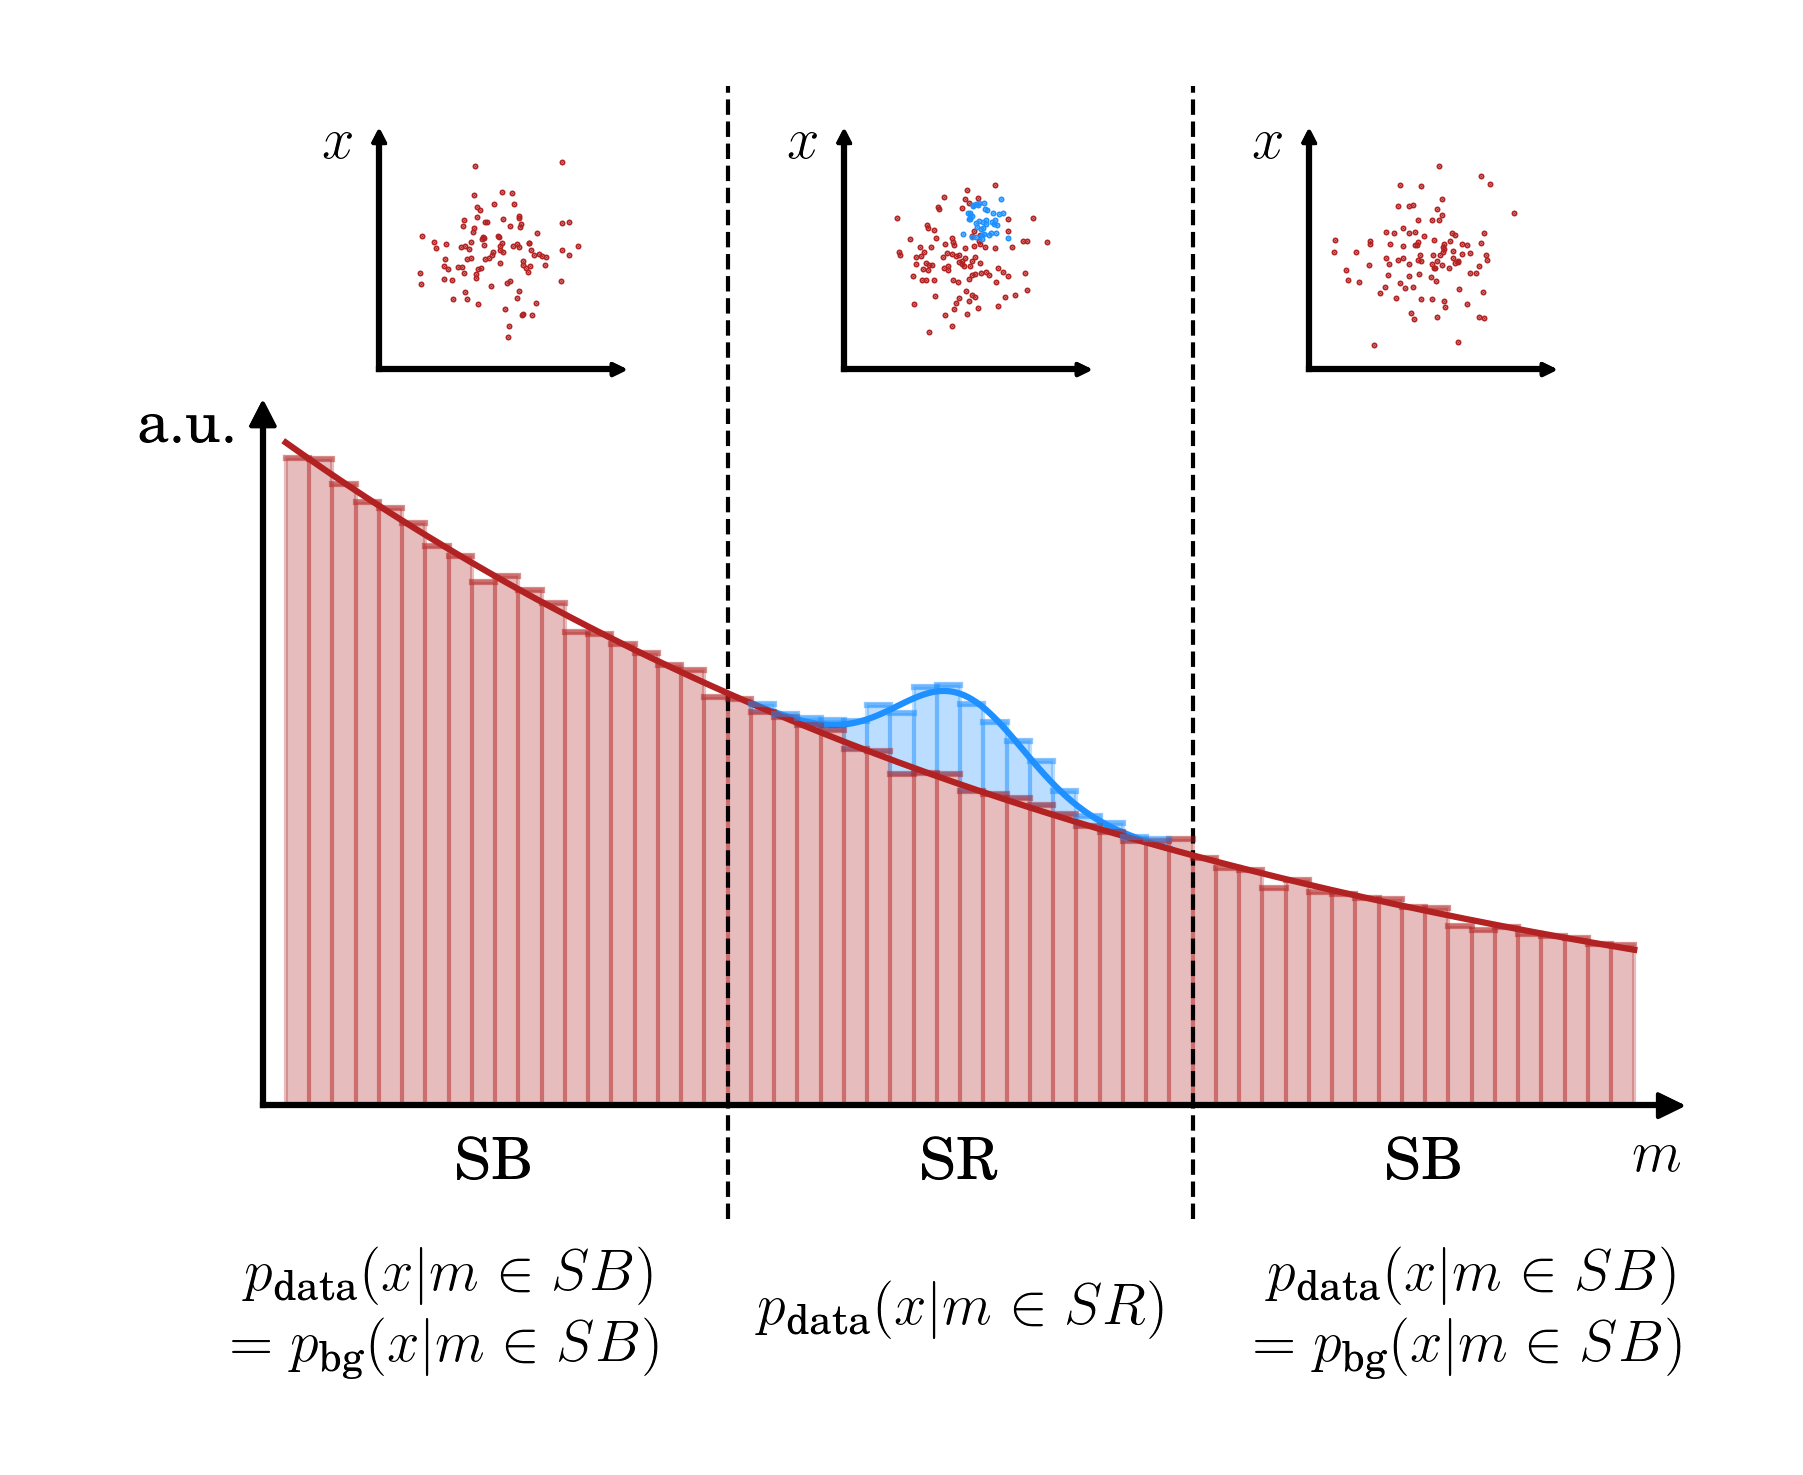

In [133]:
fig = plt.figure(dpi=300, figsize=[7.5, 6.25])

np.random.seed(1234)

def bg_func(x):
    return 3.*np.exp(-x*0.25)
def sg_func(x):
    return 0.4*np.exp(-(x-3.)**2 / .15)

def auxiliary(orig, sig=False):
    plt.plot([orig[0], orig[0]+1.], [orig[1], orig[1]],'k', lw=1.5)
    plt.plot([orig[0], orig[0]], [orig[1], orig[1]+1.],'k', lw=1.5)
    plot_arrow_head([orig[0]+1., orig[1]], [orig[0]+1.05, orig[1]], fill_color='k', fill_alpha=1.)
    plot_arrow_head_vert([orig[0], orig[1]+1.], [orig[0], orig[1]+1.05], fill_color='k', fill_alpha=1.)
    plt.text(orig[0]-0.1, orig[1]+1., r'$x$', va='center', ha='right')
    num_pts = 100
    pts = 0.15*np.random.normal(size=(2, num_pts)) + np.array([[orig[0]+0.5], [orig[1]+0.5]])
    plt.scatter(pts[0], pts[1], marker='.', s=0.75, ec='firebrick', fc='firebrick', alpha=1.)
    if sig:
        num_pts = 40
        pts = 0.05*np.random.normal(size=(2, num_pts)) + np.array([[orig[0]+0.6], [orig[1]+0.65]])
        plt.scatter(pts[0], pts[1], marker='.', s=0.75, ec='dodgerblue', fc='dodgerblue', alpha=1.)


plt.plot([0., 6.], [0., 0.], 'k', lw=1.5)
plot_arrow_head([6., 0.], [6.1, 0.], fill_color='k', fill_alpha=1.)
plt.text(6., -0.1, r'$m$', ha='center', va='top')
plt.plot([0., 0.], [0., 3.], 'k', lw=1.5)
plot_arrow_head_vert([0., 3.], [0., 3.1], fill_color='k', fill_alpha=1.)
plt.text(-0.1, 3., 'a.u.', va='center', ha='right')

plt.text(1., -0.25, 'SB', ha='center', va='center')
plt.plot([2., 2.], [-0.5, 4.5], 'k', ls='dashed', lw=1.) #3
#plt.plot([2., 2.], [3.75, 5.5], 'k', ls='dashed', lw=1.)
plt.text(3., -.25, 'SR', ha='center', va='center')
plt.plot([4., 4.], [-0.5, 4.5], 'k', ls='dashed', lw=1.) #3
#plt.plot([4., 4.], [3.75, 5.5], 'k', ls='dashed', lw=1.)
plt.text(5., -0.25, 'SB', ha='center', va='center')

x_scan_sg = np.linspace(2.1, 3.9, 101)
plt.plot(x_scan_sg, bg_func(x_scan_sg)+sg_func(x_scan_sg), color='dodgerblue')
x_scan = np.linspace(0.1, 5.9, 201)
plt.plot(x_scan, bg_func(x_scan), color='firebrick')


bins = np.linspace(0., 6., 61)
bin_centers = (bins[1:]+bins[:-1])*0.5

rnd = 0.025*np.random.normal(size=122)

for i in range(1, 59):
    value = bg_func(bin_centers[i])+rnd[i]
    plt.plot([bins[i], bins[i+1]], [value, value], color='firebrick', alpha=0.5)
    plt.fill_between([bins[i], bins[i+1]], [0., 0.], [value, value], color='firebrick', alpha=0.3)
    
for i in range(21, 39):
    bg_value = bg_func(bin_centers[i])+rnd[i]
    sg_value = abs(sg_func(bin_centers[i])+rnd[61+i])
    plt.plot([bins[i], bins[i+1]], [bg_value+sg_value, bg_value+sg_value], color='dodgerblue', alpha=0.5)
    plt.fill_between([bins[i], bins[i+1]],[bg_value, bg_value], [bg_value+sg_value, bg_value+sg_value], color='dodgerblue', alpha=0.3)


auxiliary([0.5, 3.25])
plt.text(0.8, -0.65, r'$p_\text{data}(x|m\in SB)$', va='top', ha='center')
plt.text(0.8, -0.95, r'$=p_\text{bg}(x|m\in SB) $', va='top', ha='center')
auxiliary([2.5, 3.25], sig=True)
plt.text(3., -0.8, r'$p_\text{data}(x|m\in SR)$', va='top', ha='center')
auxiliary([4.5, 3.25])
plt.text(5.2, -0.65, r'$p_\text{data}(x|m\in SB)$', va='top', ha='center')
plt.text(5.2, -0.95, r'$=p_\text{bg}(x|m\in SB) $', va='top', ha='center')
    
plt.gca().axis('off')
plt.xlim([-1., 6.5])
plt.ylim([-1.5, 4.75])

plt.savefig('SB-SR.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

plt.show()